In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
df = pd.read_table('evidence_exp1.txt')
df.head()

/Users/mtinti/miniconda3/envs/prediction/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Sequence,Length,Modifications,Modified sequence,Oxidation (M) Probabilities,Oxidation (M) Score Diffs,Acetyl (Protein N-term),Oxidation (M),Missed cleavages,Proteins,...,Reverse,Potential contaminant,id,Protein group IDs,Peptide ID,Mod. peptide ID,MS/MS IDs,Best MS/MS,AIF MS/MS IDs,Oxidation (M) site IDs
0,AAAAAAAAAAAAAAAGAAGK,20,Unmodified,_AAAAAAAAAAAAAAAGAAGK_,NaN,NaN,0,0,0,E9QM38;P55012,...,NaN,NaN,0,2327,0,0,0,0,NaN,NaN
1,AAAAAAAAAAAAAAAGAAGK,20,Unmodified,_AAAAAAAAAAAAAAAGAAGK_,NaN,NaN,0,0,0,E9QM38;P55012,...,NaN,NaN,1,2327,0,0,1,1,NaN,NaN
2,AAAAAAAAAAAAAAAGAAGK,20,Unmodified,_AAAAAAAAAAAAAAAGAAGK_,NaN,NaN,0,0,0,E9QM38;P55012,...,NaN,NaN,2,2327,0,0,2,2,NaN,NaN
3,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,1,0,0,G3UY42;Q8CCS6-2;Q8CCS6;G3UX74,...,NaN,NaN,3,2572,1,1,3,3,NaN,NaN
4,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,1,0,0,G3UY42;Q8CCS6-2;Q8CCS6;G3UX74,...,NaN,NaN,4,2572,1,1,4,4,NaN,NaN


In [27]:
#df.columns

In [28]:
df = df[df['Reverse']!='+']
df = df[df['Potential contaminant']!='+']
#df['Fraction'].value_counts()
temp = df[['Sequence','Proteins']]
temp.drop_duplicates(subset=['Sequence'],inplace=True)
temp.set_index('Sequence',inplace=True)
pep_to_prot = temp.to_dict()

/Users/mtinti/miniconda3/envs/prediction/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [29]:
#pep_to_prot

In [30]:
df['Raw file'].head()

0    PT8087-22
1    PT8087-22
2    PT8087-42
3    PT8087-10
4    PT8087-11
Name: Raw file, dtype: object

In [31]:
data=df[['Sequence', 'Experiment', 'Reporter intensity corrected 0',
       'Reporter intensity corrected 1', 'Reporter intensity corrected 2',
       'Reporter intensity corrected 3', 'Reporter intensity corrected 4',
       'Reporter intensity corrected 5', 'Reporter intensity corrected 6',
       'Reporter intensity corrected 7', 'Reporter intensity corrected 8',
       'Reporter intensity corrected 9']]

In [32]:
res = data.groupby(['Sequence', 'Experiment']).sum().unstack()
res.columns = [n[0] + ' '+ n[1] for n in res.columns]
res.replace(0,np.nan,inplace=True)
#res.dropna(inplace=True)
res.head()

,Reporter intensity corrected 0 Hippo,Reporter intensity corrected 0 Hypo,Reporter intensity corrected 1 Hippo,Reporter intensity corrected 1 Hypo,Reporter intensity corrected 2 Hippo,Reporter intensity corrected 2 Hypo,Reporter intensity corrected 3 Hippo,Reporter intensity corrected 3 Hypo,Reporter intensity corrected 4 Hippo,Reporter intensity corrected 4 Hypo,Reporter intensity corrected 5 Hippo,Reporter intensity corrected 5 Hypo,Reporter intensity corrected 6 Hippo,Reporter intensity corrected 6 Hypo,Reporter intensity corrected 7 Hippo,Reporter intensity corrected 7 Hypo,Reporter intensity corrected 8 Hippo,Reporter intensity corrected 8 Hypo,Reporter intensity corrected 9 Hippo,Reporter intensity corrected 9 Hypo
Sequence,,,,,,,,,,,,,,,,,,,,
AAAAAAAAAAAAAAAGAAGK,30798.0,27559.00,31390.0,40018.00,31873.0,28022.00,31132.0,32625.00,35085.0,30973.00,22232.4,29974.00,14211.0,40952.00,19749.8,21994.00,14905.9,42758.00,9450.5,27611.00
AAAAAAAAAAGAAGGR,25380.0,2138.73,25360.0,1969.98,26319.0,1571.46,28833.0,2032.94,27959.0,1635.04,23317.5,2287.83,22028.4,2247.11,24274.0,1696.33,29044.0,2510.76,80779.0,659.03
AAAAAAAAAAGDSDSWDADTFSMEDPVR,4488.0,NaN,4324.5,NaN,3461.3,NaN,4628.8,NaN,5394.5,NaN,3718.2,NaN,3946.0,NaN,4092.5,NaN,3815.6,NaN,5158.5,NaN
AAAAAAAAVGDPQPPQPEAPAQGLALDK,5747.2,NaN,5984.5,NaN,6235.6,NaN,5619.2,NaN,6197.7,NaN,4604.3,NaN,3346.7,NaN,5439.5,NaN,6320.1,NaN,11100.0,NaN
AAAAAADGERPGPGPLLVGCSR,14975.0,3741.00,9562.9,7740.00,9489.2,5502.50,8598.8,5411.60,8468.2,26860.00,13168.0,3913.70,6675.7,5937.20,9631.0,4435.90,9259.7,9588.10,2273.5,1563.50


In [33]:
def constandNormalize(df='', n_channels= 10 ):
    n_channels= n_channels
    
    def compute(X):
        X = X / (n_channels * X.mean())
        return X
        
    def step(df):
        df = df.apply(compute, axis=1)
        error_row = abs(df.mean(axis=0) - (float(1)/n_channels )  ).sum()/2
        df = df.apply(compute, axis=0)
        error_col = abs(df.mean(axis=1) - (float(1)/n_channels )  ).sum()/2
        return df, error_row, error_col
        
    def normalize(df):
        error_col = 1
        error_row = 1
        a=0
        while 1:
            a+=1
            df, error_row, error_col = step(df)
            print (a,error_row, error_col)
            if a >50:
                print ('normalized in',a,'steps')
                return df
            if (error_row < 1e-5) and (error_col < 1e-5):
            #if ((error_row + error_col)/2 )< 1e-5: 
            #if (error_row < 1e-5) or (error_col < 1e-5):             
                print ('normalized in',a,'steps')
                return df 
    return normalize(df)



/Users/mtinti/miniconda3/envs/prediction/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


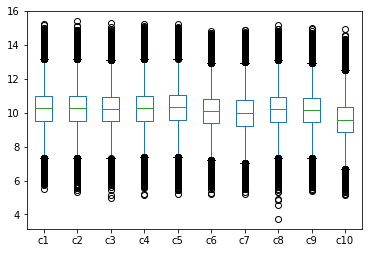

/Users/mtinti/miniconda3/envs/prediction/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


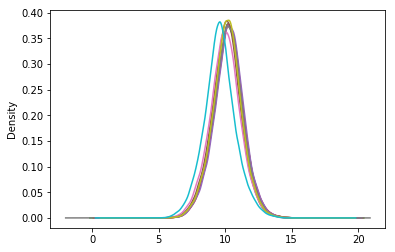

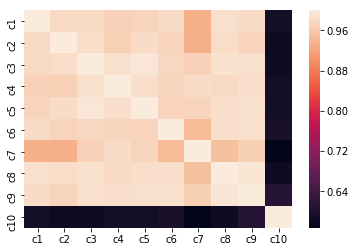

In [34]:
Hippo = res[res.columns[::2]]
#Hippo.dropna(inplace=True)
Hippo.columns = ['c'+str(n) for n in range(1,11)]
np.log1p(Hippo).plot(kind='box')
plt.show()
np.log1p(Hippo).plot(kind='kde',legend=False)
plt.show()
sns.heatmap(Hippo.corr())
plt.show()

Sequence
AAAAAAAAAAAAAAAGAAGK                       240827.60
AAAAAAAAAAGAAGGR                           313293.90
AAAAAAAAAAGDSDSWDADTFSMEDPVR                43027.90
AAAAAAAAVGDPQPPQPEAPAQGLALDK                60594.80
AAAAAADGERPGPGPLLVGCSR                      92102.00
AAAAAAGAASGLPGPVAQGLK                      166573.00
AAAAAAGPEMVR                               884048.30
AAAAAAPGGGGGEPR                            108869.70
AAAAAASHLNLDALR                            254796.60
AAAAAEASGPSCSSAAAAAGAGAAGVSEWLVLR           14274.40
AAAAAGPASSQR                                62802.30
AAAAAGPGAWAAQEK                             88186.80
AAAAAMAEQEGAR                              102196.60
AAAAASAK                                   839342.55
AAAAASGAGGVAVAGAGGAGPAGR                    53774.00
AAAAATAAAAAAPSGGGGGGEEER                   205438.10
AAAAATAAAAAAPSGGGGGGEEERLEEK               439566.50
AAAAATAAAAAAPSGGGGGGEEERLEEKSEDQDLQGLR          0.00
AAAAATAATK                           

In [40]:
temp = pd.DataFrame()
temp['exp1']=Hippo.sum(axis=0, skipna=True)
temp['target']=temp['exp1'].mean()
temp['n1'] = temp.target / temp.exp1
temp.head()

,exp1,target,n1
c1,3.950738e+09,3.578700e+09,0.905831
c2,3.953679e+09,3.578700e+09,0.905157
c3,3.814257e+09,3.578700e+09,0.938243
c4,4.013614e+09,3.578700e+09,0.891640
c5,4.116333e+09,3.578700e+09,0.869390


In [41]:
Hippo_sl = Hippo.multiply(temp['n1'].values)
Hippo_sl.head()



,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
Sequence,,,,,,,,,,
AAAAAAAAAAAAAAAGAAGK,27897.776511,28412.881909,29904.627497,27758.548883,30502.561811,24305.238466,16097.554831,19031.696680,15357.093237,14588.470982
AAAAAAAAAAGAAGGR,22989.985319,22954.784492,24693.624419,25708.667608,24307.285897,25491.507797,24952.739204,23391.396633,29923.145599,124696.269773
AAAAAAAAAAGDSDSWDADTFSMEDPVR,4065.368562,3914.351953,3247.541404,4127.225076,4689.926456,4064.866486,4469.843879,3943.696577,3931.096073,7963.031328
AAAAAAAAVGDPQPPQPEAPAQGLALDK,5205.990687,5416.912768,5850.509686,5010.305727,5388.220816,5033.582046,3790.984924,5241.719617,6511.405884,17134.757728
AAAAAADGERPGPGPLLVGCSR,13564.816003,8655.926996,8903.177964,7667.037458,7362.171695,14395.718866,7561.920117,9280.816551,9539.985928,3509.537990


/Users/mtinti/miniconda3/envs/prediction/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log1p
  """Entry point for launching an IPython kernel.


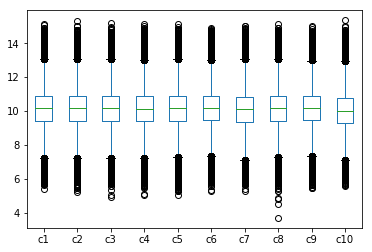

/Users/mtinti/miniconda3/envs/prediction/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until


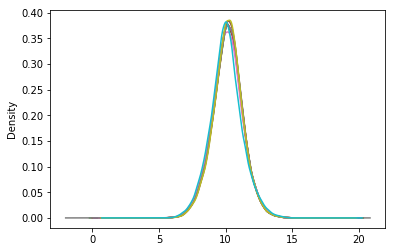

In [42]:
np.log1p(Hippo_sl).plot(kind='box')
plt.show()
np.log1p(Hippo_sl).plot(kind='kde',legend=False)
plt.show()

In [43]:
Hippo_sl.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
Sequence,,,,,,,,,,
AAAAAAAAAAAAAAAGAAGK,27897.776511,28412.881909,29904.627497,27758.548883,30502.561811,24305.238466,16097.554831,19031.696680,15357.093237,14588.470982
AAAAAAAAAAGAAGGR,22989.985319,22954.784492,24693.624419,25708.667608,24307.285897,25491.507797,24952.739204,23391.396633,29923.145599,124696.269773
AAAAAAAAAAGDSDSWDADTFSMEDPVR,4065.368562,3914.351953,3247.541404,4127.225076,4689.926456,4064.866486,4469.843879,3943.696577,3931.096073,7963.031328
AAAAAAAAVGDPQPPQPEAPAQGLALDK,5205.990687,5416.912768,5850.509686,5010.305727,5388.220816,5033.582046,3790.984924,5241.719617,6511.405884,17134.757728
AAAAAADGERPGPGPLLVGCSR,13564.816003,8655.926996,8903.177964,7667.037458,7362.171695,14395.718866,7561.920117,9280.816551,9539.985928,3509.537990


In [44]:
irs = Hippo_sl.sum(axis=1).to_frame()
irs.columns=['sum']
Hippo_sl = Hippo_sl.divide(irs['sum'].values, axis='index')
Hippo_sl.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
Sequence,,,,,,,,,,
AAAAAAAAAAAAAAAGAAGK,0.119294,0.121497,0.127876,0.118699,0.130433,0.103932,0.068835,0.081382,0.065669,0.062382
AAAAAAAAAAGAAGGR,0.065853,0.065752,0.070733,0.073641,0.069627,0.073019,0.071475,0.067003,0.085713,0.357184
AAAAAAAAAAGDSDSWDADTFSMEDPVR,0.091527,0.088127,0.073115,0.092920,0.105589,0.091516,0.100634,0.088788,0.088504,0.179279
AAAAAAAAVGDPQPPQPEAPAQGLALDK,0.080608,0.083873,0.090587,0.077578,0.083429,0.077938,0.058698,0.081161,0.100820,0.265308
AAAAAADGERPGPGPLLVGCSR,0.149985,0.095708,0.098442,0.084774,0.081403,0.159172,0.083612,0.102617,0.105483,0.038805


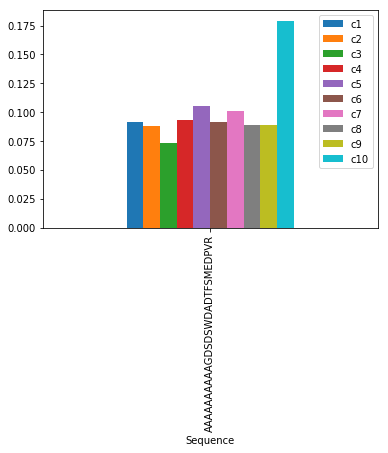

In [45]:
Hippo_sl['prot']=[pep_to_prot['Proteins'][n] for n in Hippo_sl.index.values]
selection = Hippo_sl[Hippo_sl['prot'].isin(['Q3UGC7'])]
selection.plot(kind='bar')

In [46]:
def find_prot(inlist, prot='Q3UGC7'):
    out = []
    for p,n in enumerate(inlist):
        if prot in n:
            out.append( p)
    return out

temp_index = find_prot(Hippo_sl['prot'].values, prot='P56818')

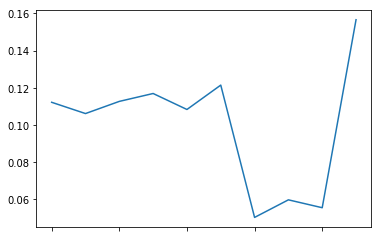

In [47]:
Hippo_sl.iloc[temp_index,:-1].mean().plot()
Hippo_sl.iloc[temp_index].head(20)
Hippo_sl.to_csv('pep_norm_hippo.csv')

In [48]:
Hypo = res[res.columns[1::2]]
Hypo.head()

,Reporter intensity corrected 0 Hypo,Reporter intensity corrected 1 Hypo,Reporter intensity corrected 2 Hypo,Reporter intensity corrected 3 Hypo,Reporter intensity corrected 4 Hypo,Reporter intensity corrected 5 Hypo,Reporter intensity corrected 6 Hypo,Reporter intensity corrected 7 Hypo,Reporter intensity corrected 8 Hypo,Reporter intensity corrected 9 Hypo
Sequence,,,,,,,,,,
AAAAAAAAAAAAAAAGAAGK,27559.00,40018.00,28022.00,32625.00,30973.00,29974.00,40952.00,21994.00,42758.00,27611.00
AAAAAAAAAAGAAGGR,2138.73,1969.98,1571.46,2032.94,1635.04,2287.83,2247.11,1696.33,2510.76,659.03
AAAAAAAAAAGDSDSWDADTFSMEDPVR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAAAAAAVGDPQPPQPEAPAQGLALDK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAAAADGERPGPGPLLVGCSR,3741.00,7740.00,5502.50,5411.60,26860.00,3913.70,5937.20,4435.90,9588.10,1563.50


/Users/mtinti/miniconda3/envs/prediction/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


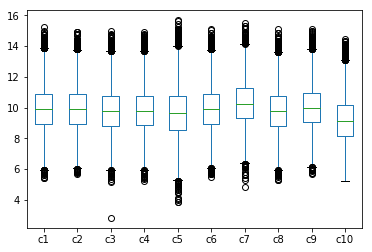

In [49]:
Hypo.dropna(inplace=True)
Hypo.columns = ['c'+str(n) for n in range(1,11)]

np.log1p(Hypo).plot(kind='box')
plt.show()

In [50]:
temp = pd.DataFrame()
temp['exp1']=Hypo.sum(axis=0, skipna=True)
temp['target']=temp['exp1'].mean()
temp['n1'] = temp.target / temp.exp1
temp.head()



,exp1,target,n1
c1,2.830373e+09,2.754189e+09,0.973083
c2,2.816651e+09,2.754189e+09,0.977824
c3,2.529062e+09,2.754189e+09,1.089016
c4,2.601962e+09,2.754189e+09,1.058505
c5,2.938656e+09,2.754189e+09,0.937228


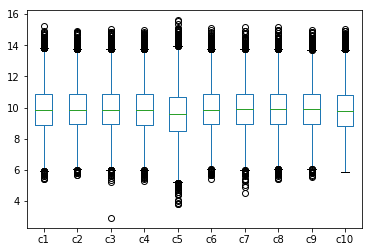

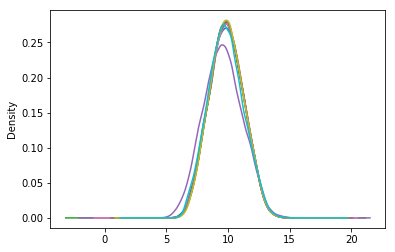

In [51]:
Hypo_sl = Hypo.multiply(temp['n1'].values)
Hypo_sl.head()
np.log1p(Hypo_sl).plot(kind='box')
plt.show()
np.log1p(Hypo_sl).plot(kind='kde',legend=False)
plt.show()

In [52]:
irs = Hypo_sl.sum(axis=1).to_frame()
irs.columns=['sum']
Hypo_sl = Hypo_sl.divide(irs['sum'].values,axis='index')
Hypo_sl.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
Sequence,,,,,,,,,,
AAAAAAAAAAAAAAAGAAGK,0.080732,0.117800,0.091868,0.103962,0.087389,0.087428,0.084459,0.074770,0.116249,0.155344
AAAAAAAAAAGAAGGR,0.112048,0.103710,0.092137,0.115855,0.082503,0.119342,0.082883,0.103133,0.122079,0.066311
AAAAAADGERPGPGPLLVGCSR,0.050175,0.104315,0.082592,0.078952,0.346974,0.052265,0.056062,0.069043,0.119349,0.040274
AAAAAAGAASGLPGPVAQGLK,0.085176,0.095114,0.105683,0.083499,0.095923,0.106450,0.110074,0.120907,0.108708,0.088465
AAAAAAGPEMVR,0.056662,0.109588,0.092959,0.137110,0.112276,0.094594,0.068803,0.087957,0.108055,0.131997


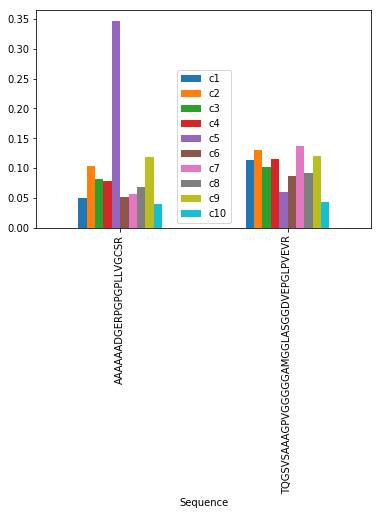

In [53]:
Hypo_sl['prot']=[pep_to_prot['Proteins'][n] for n in Hypo_sl.index.values]
selection = Hypo_sl[Hypo_sl['prot'].isin(['Q3TA75'])]
selection.plot(kind='bar')

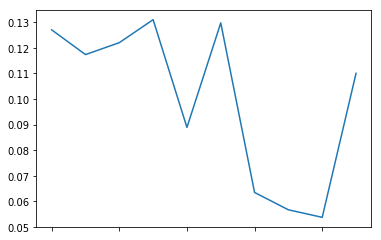

In [54]:
temp_index = find_prot(Hypo_sl['prot'].values, prot='P56818')
Hypo_sl.iloc[temp_index,:-1].mean().plot()
Hypo_sl.iloc[temp_index].head(20)
Hypo_sl.to_csv('pep_norm_hypo.csv')

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,prot
Sequence,,,,,,,,,,,
ETDEESEEPGR,0.154328,0.116378,0.146664,0.139592,0.055201,0.166494,0.052267,0.036748,0.027032,0.105296,Q8C7R1;Q8BQY4;P56818;Q8C4F4
GSFVEMVDNLR,0.098081,0.114363,0.103662,0.114887,0.146849,0.105992,0.066603,0.065543,0.068736,0.115284,Q8C7R1;Q8BQY4;P56818;Q8C4F4
SIVDSGTTNLR,0.128769,0.121397,0.115785,0.138631,0.064608,0.116848,0.071416,0.067663,0.065330,0.109553,Q8C7R1;Q8BQY4;P56818;Q9CUU5;F6TV37;Q69ZQ6
